In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


import the data, all data are sperate by tab.

In [2]:
campaign = pd.read_csv('marketing_campaign.csv', delimiter = '\t')
campaign

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Exam dataset structure.

In [3]:
campaign.shape

(2240, 29)

In [4]:
campaign.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

I will do customer personality analysis in this research by age, education, martial status and income.

In [6]:
analysis = campaign[['Year_Birth', 'Education', 'Marital_Status', 'Income','MntWines']]
analysis

,Year_Birth,Education,Marital_Status,Income,MntWines
0,1957,Graduation,Single,58138.0,635
1,1954,Graduation,Single,46344.0,11
2,1965,Graduation,Together,71613.0,426
3,1984,Graduation,Together,26646.0,11
4,1981,PhD,Married,58293.0,173
...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,709
2236,1946,PhD,Together,64014.0,406
2237,1981,Graduation,Divorced,56981.0,908
2238,1956,Master,Together,69245.0,428


use current year minus birth year to get the age of the customer.

In [7]:
analysis['Age'] = 2021 - analysis.Year_Birth

<ipython-input-7-396171665e8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['Age'] = 2021 - analysis.Year_Birth


In [8]:
analysis.isna().sum()

Year_Birth         0
Education          0
Marital_Status     0
Income            24
MntWines           0
Age                0
dtype: int64

In [9]:
analysis = analysis.dropna()
analysis.shape

(2216, 6)

In [10]:
analysis.describe()

,Year_Birth,Income,MntWines,Age
count,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,305.091606,52.179603
std,11.985554,25173.076661,337.327920,11.985554
min,1893.000000,1730.000000,0.000000,25.000000
25%,1959.000000,35303.000000,24.000000,44.000000
50%,1970.000000,51381.500000,174.500000,51.000000
75%,1977.000000,68522.000000,505.000000,62.000000
max,1996.000000,666666.000000,1493.000000,128.000000


Customer Education level counts

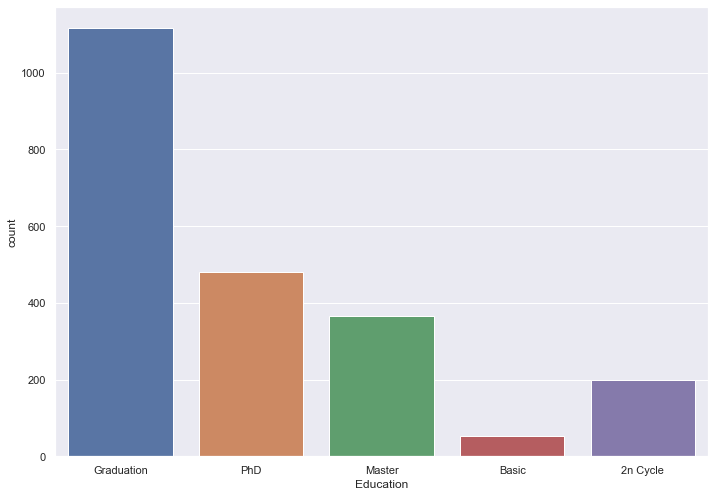

In [11]:
classplot = sns.countplot(x="Education", data=analysis)


How education level affects the amount of wine spendings in average.

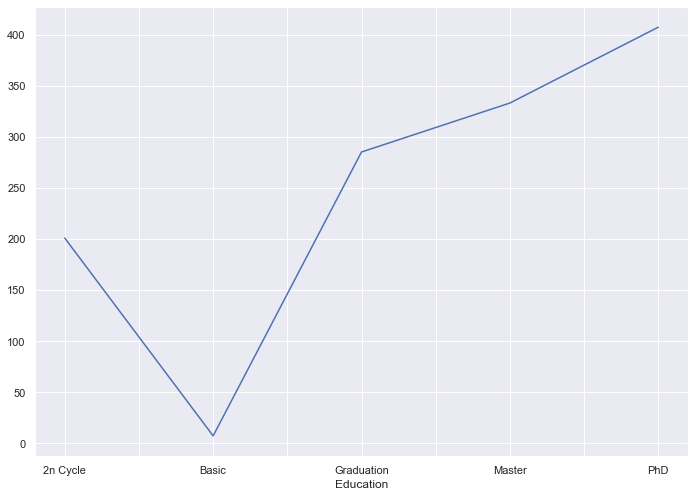

In [12]:
group_edu = analysis.groupby(['Education']).mean()
group_edu['MntWines'].plot()

Customer Marital status level counts

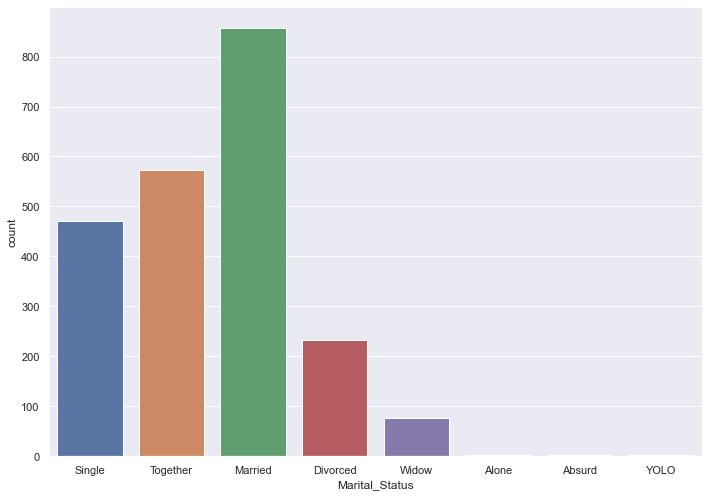

In [13]:
classplot = sns.countplot(x="Marital_Status", data=analysis)


How Marital status affects the amount of wine spendings in average.

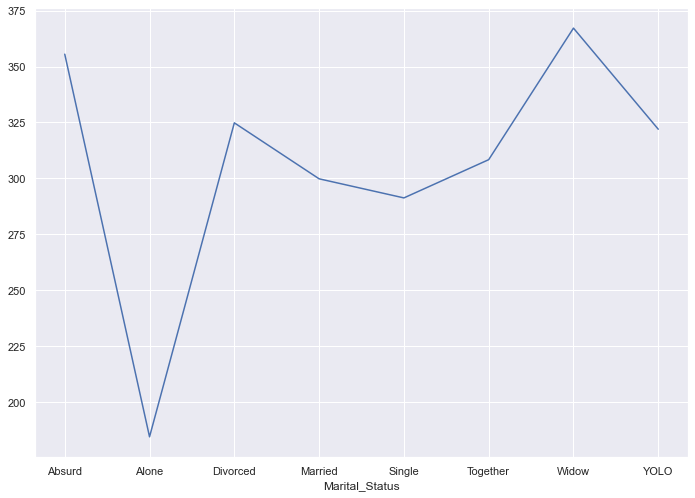

In [14]:
group_martial = analysis.groupby(['Marital_Status']).mean()
group_martial['MntWines'].plot()

The relationship between incomes and wine spendings.

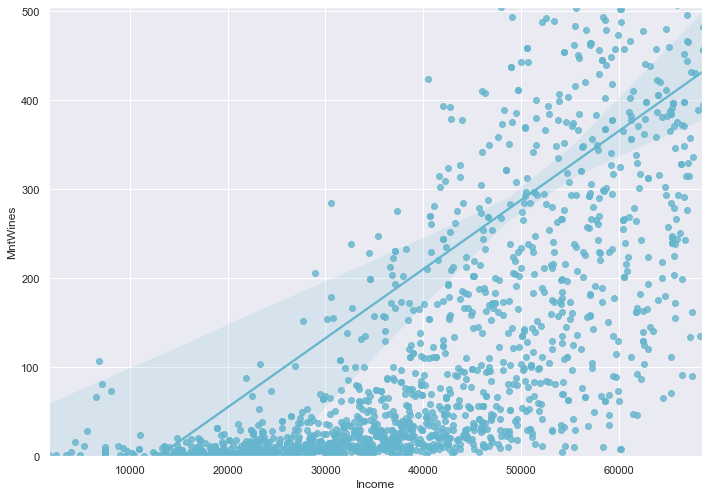

In [15]:
fig, ax = plt.subplots()
sns.regplot(x='Income',y='MntWines',data=analysis,color='c')
ax.set(ylim=(0, 505))
ax.set(xlim=(1730, 68522))
plt.show()

Customer age distribution 

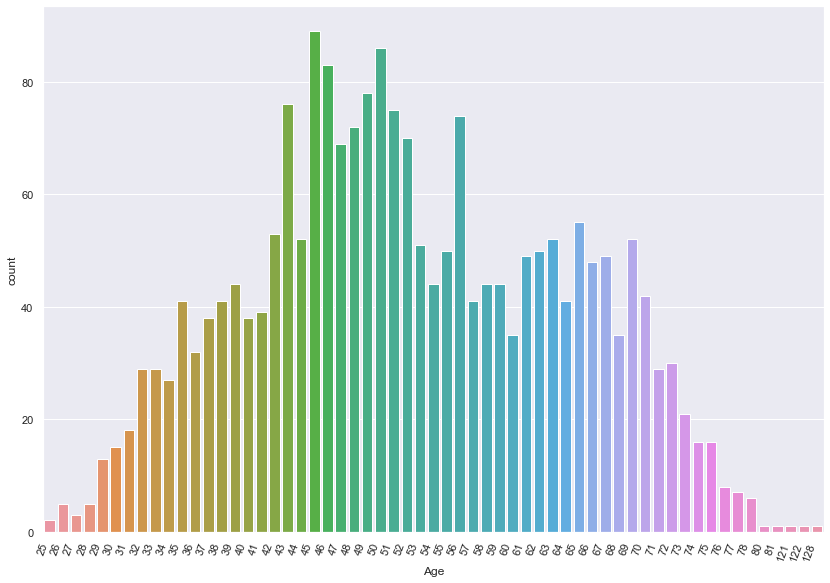

In [16]:

ax = sns.countplot(x= 'Age', data=analysis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")
plt.tight_layout()
plt.show()

relationship between age and wine spendings.

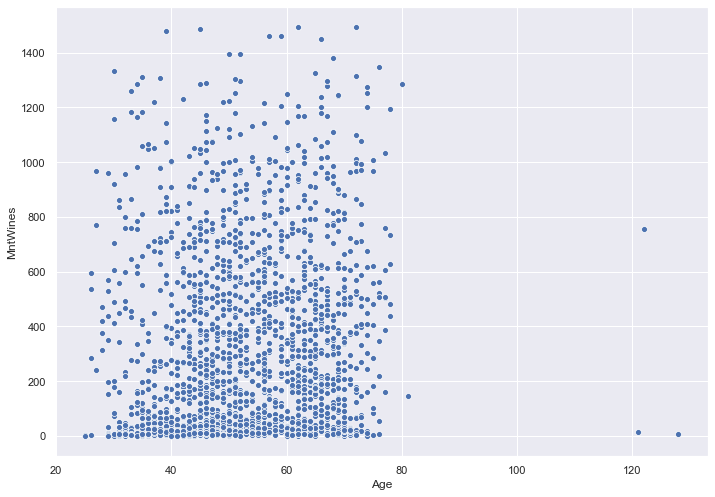

In [17]:
sns.scatterplot(x="Age", y="MntWines", data=analysis);


scatterplot for Education, marital status and wine spending 

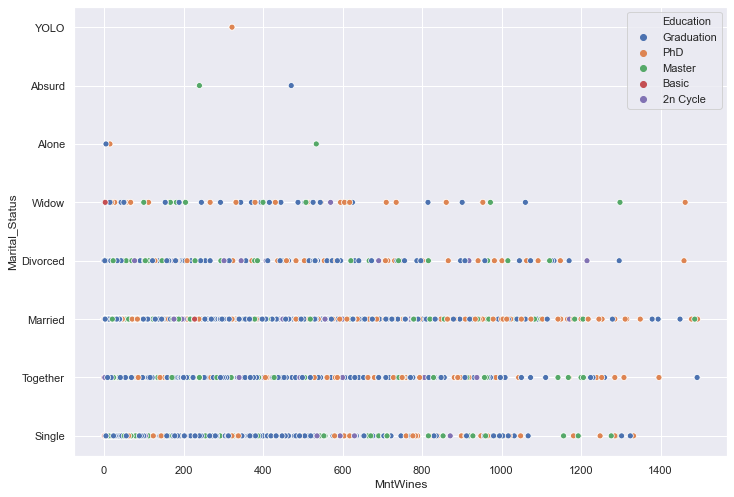

In [18]:
sns.scatterplot(data = analysis, x ="MntWines",y = "Marital_Status", hue = "Education")
